# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turning project folder into string path 
path = r'C:\Users\keirr\11-2020 Instacart Basket Analysis'

In [3]:
# Importing sample.pkl dataset with path
sample = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small_sample.pkl'))

In [4]:
# Checking df
sample.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,num_of_kids,married_single,income,_merge,region,total_order,customer_profile,age_group,income_level_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,10,Married Adult Parent,30-49,Lower Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,10,Married Adult Parent,30-49,Lower Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,10,Married Adult Parent,30-49,Lower Income
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,10,Married Adult Parent,30-49,Lower Income
10,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,both,South,10,Married Adult Parent,30-49,Lower Income


# Contents
## 1. Are there differences in ordering habits based on a customer’s region?
###  a) Order Habits by Region via line chart 
###  b) Days Since Last Order by Region via displot()
###  c) Income Levels of Regions
## 2. What differences can you find in ordering habits of different customer profiles?
###  a) Popular Hours of the Day by Customer Profile
###  b) Popular Departments per Customer Profile via countplot()
###  c) Habits of Customer Profiles via line chart

# 1. Are there differences in ordering habits based on a customer’s region?

## a) Order Habits by Region via line chart 

In [5]:
# Subsetting df for cols necessary
region = sample[['orders_day_of_the_week', 'prices', 'region']]

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0, 0.5, 'Prices')

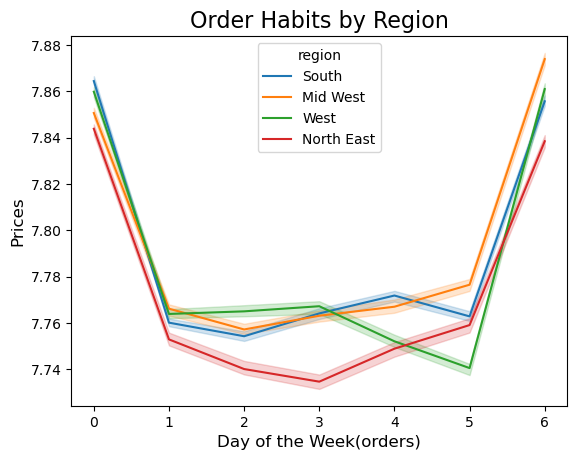

In [6]:
# Utilizing line chart to show changes in prices over the week (Mon.-Sun.) by region
line = sns.lineplot(data= region, x= 'orders_day_of_the_week', y= 'prices', hue= 'region', errorbar= ('ci', 25))

# Adding title, labels, etc.
plt.title('Order Habits by Region', fontsize=16)
plt.xlabel('Day of the Week(orders)', fontsize=12)
plt.ylabel('Prices', fontsize=12)

In [53]:
# Saving 'line' image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_dow_region.png'))

## b) Days Since Last Order by Region via displot()

In [7]:
# Subsetting df to include only cols that are necessary
region_2 = sample[['days_since_last_order', 'region']]

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

Text(0.5, 0.98, 'Days Since Last Order by Region')

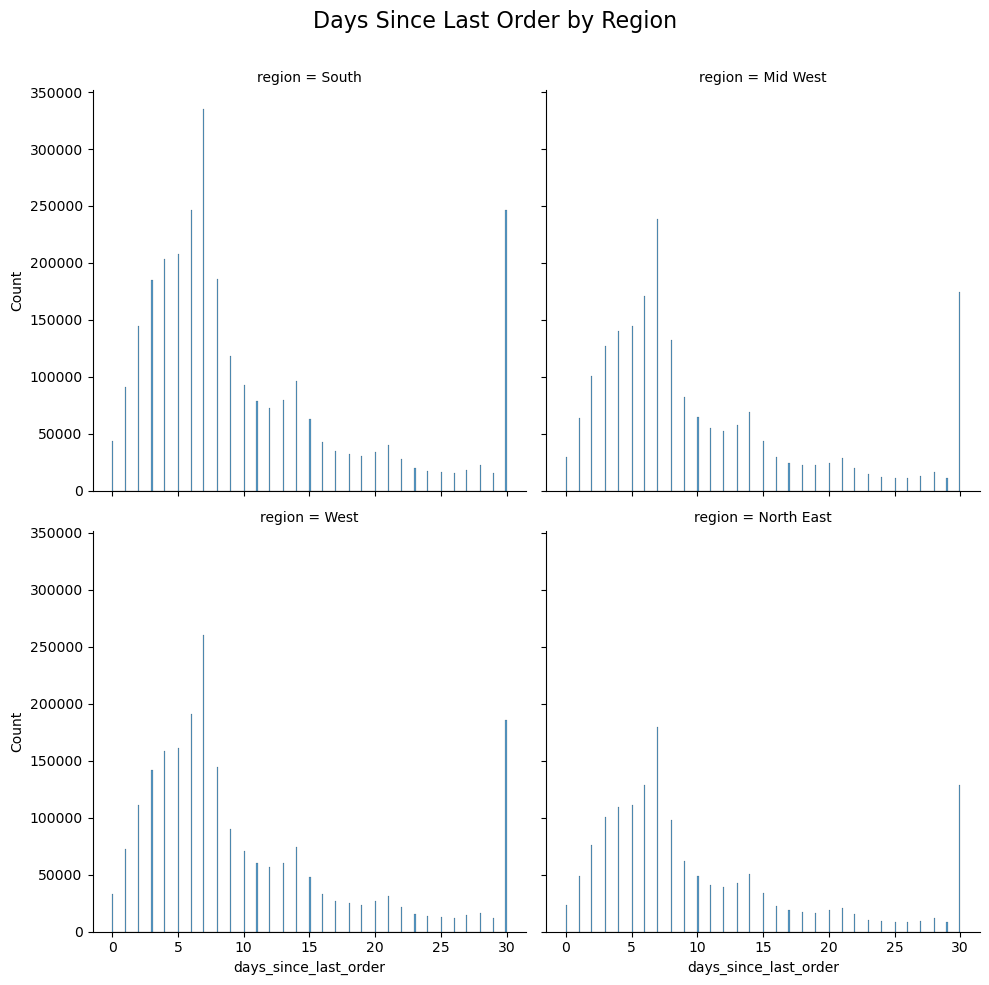

In [8]:
# Utilizing distplot() to show distribution of days since last order by region specifically
# Facetgrid to include all 4 regions
hist = sns.displot(region_2, x='days_since_last_order', col="region", col_wrap=2)

# Adding title, labels, adjusting legend, etc
plt.subplots_adjust(top=0.9)
plt.suptitle('Days Since Last Order by Region', fontsize=16)

In [54]:
# Saving 'hist' image
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'days_last_order_region.png'))

## c) Income Levels of Regions

In [9]:
# Subsetting sample to include only cols necessary
income_region = sample[['income_level_flag', 'region', 'customer_profile']]

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

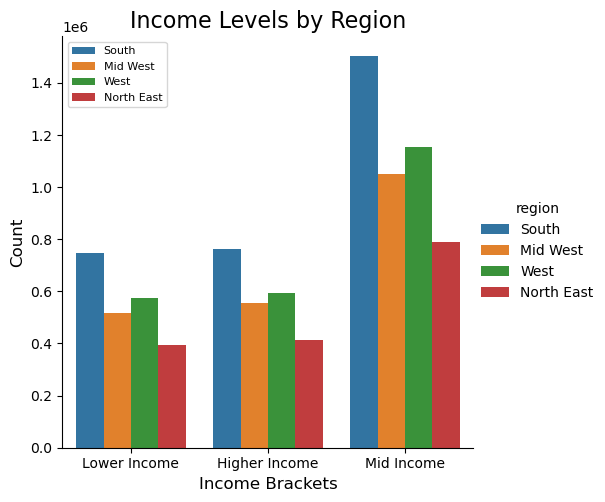

In [10]:
incomes = sns.catplot(data=income_region, x= 'income_level_flag', hue= 'region', kind='count')

# Adding title, labels, adjusting legend, etc
plt.title('Income Levels by Region', fontsize=16)
plt.xlabel('Income Brackets', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(fontsize=8)

In [11]:
# Saving 'incomes' image
incomes.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'count_income_region.png'))

# 2. What differences can you find in ordering habits of different customer profiles?

## a) Popular Hours of the Day by Customer Profile

In [12]:
# Subsetting sample to include only cols necessary
cust_hours = sample[['order_hour_of_day', 'prices', 'customer_profile']]

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

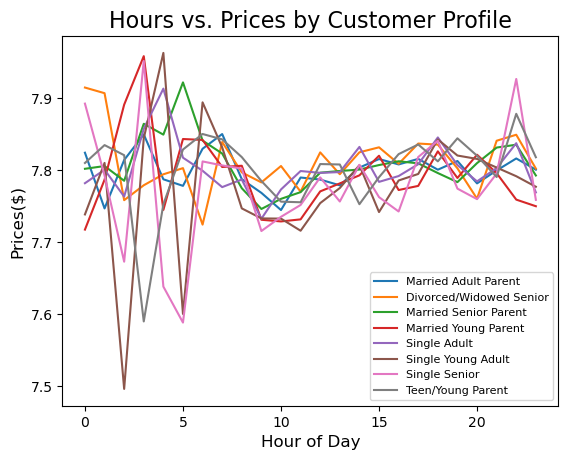

In [13]:
# Utilizing line chart to show changes of price-points throughout the week, per customer profile
line_hours = sns.lineplot(data= cust_hours, x= 'order_hour_of_day', y= 'prices', hue= 'customer_profile', errorbar= None)

# Adding title, labels, adjusting legend, etc
plt.title('Hours vs. Prices by Customer Profile', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Prices($)', fontsize=12)
plt.legend(fontsize=8)

In [14]:
# Saving 'boxplot' image
line_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_hours_line.png'))

## b) Popular Departments per Customer Profile via countplot()

In [14]:
# Subsetting sample to include only cols necessary
cust_dep = sample[['department_id', 'customer_profile']]

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0.5, 0.98, 'Popular Departments per Customer Profile')

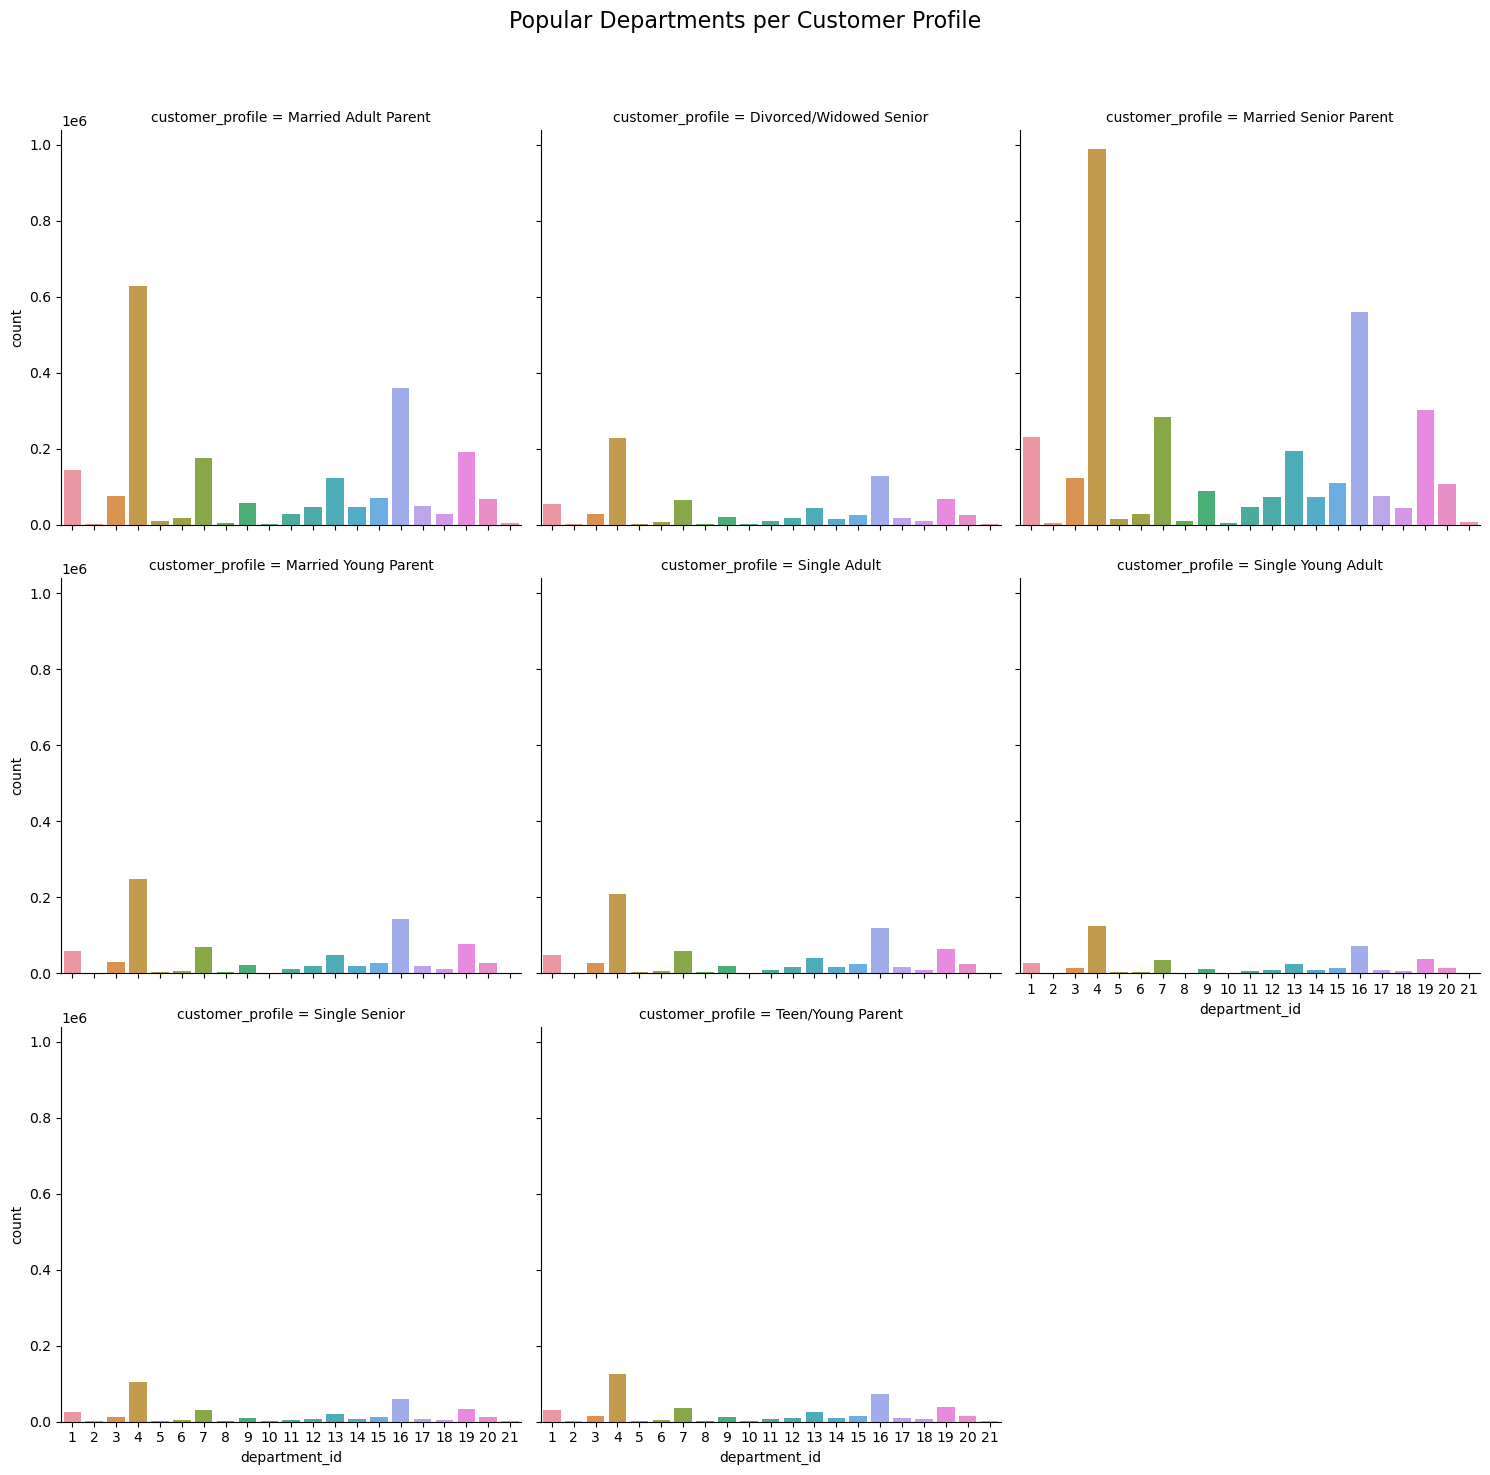

In [15]:
# Utilizing catplot() to show count of dep_id per customer_profile
# Faceting graphs to see all info
count_plot = sns.catplot(x='department_id', kind='count', col= 'customer_profile', col_wrap=3, data=cust_dep, orient="h")

# Adding title, labels, adjusting legend, etc
plt.subplots_adjust(top=0.9)
plt.suptitle('Popular Departments per Customer Profile', fontsize=16)

In [56]:
# Saving 'count_plot' image
count_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_count_dep_id.png'))

## c) Habits of Customer Profiles via line chart 

In [16]:
# Subsetting sample to create line chart 
cust_habits = sample[['orders_day_of_the_week', 'prices', 'customer_profile']]

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

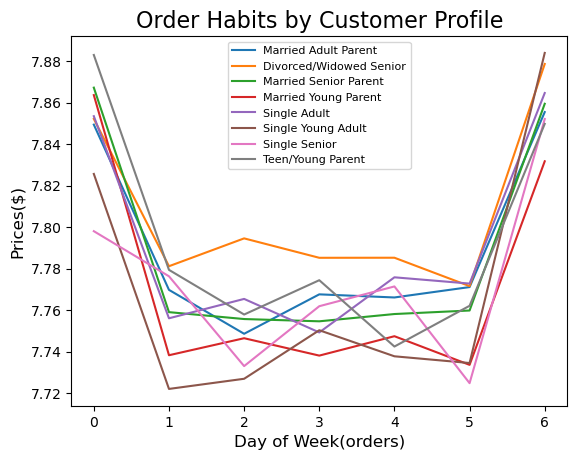

In [17]:
# Utilizing line chart to show changes of price-points throughout the week, per customer profile
line_2 = sns.lineplot(data= cust_habits, x= 'orders_day_of_the_week', y= 'prices', hue= 'customer_profile', errorbar= None)

# Adding title, labels, adjusting legend, etc
plt.title('Order Habits by Customer Profile', fontsize=16)
plt.xlabel('Day of Week(orders)', fontsize=12)
plt.ylabel('Prices($)', fontsize=12)
plt.legend(fontsize=8)

In [59]:
# Saving 'bar' image
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_habits_cust.png'))